In [34]:
import json
import networkx as nx
import numpy as np
import os
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
from classes_analysis import  fancy_heatmap,get_change,writeClassesInterventionToExcel,df_to_excel,get_correlations,allChildrenInClass,get_df_class_children_topology_analysis,get_classes_intervention_comparison_plots,class_network_details,get_all_interventions_per_model_plots, get_intervention_model_comparison_plots, get_classes_intervention_results,get_class_graphs, get_interventions_differences, get_intervention_per_child_plots
from tuning import grid_search
from models import diffuse_behavior_PA, contagion_model, get_graphs_PA_df, get_graphs_PA_df_detailed
from networkPA import get_empirical,generate_network_PA, create_agents_PA, remove_nodes_PA, generate_PA, generate_environment, generate_bmi, get_bmi_cat     
from interventionsPA import apply_intervention_random_nodes
from interventionsPA import apply_interventions_centrality, apply_interventions_high_risk
from interventionsPA import apply_interventions_vulnerability, apply_intervention_max_influence
from networkx.algorithms import approximation as app
from scipy.stats import pearsonr
import seaborn as sns
import pylab
from scipy.stats import mannwhitneyu
import datetime
from sklearn.metrics import mean_absolute_error
from math import sqrt
import statsmodels.api as sm
from itertools import chain

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
# calculate the desired interventions and get the intervention differences
df_diffusion,_,graph,_=get_classes_intervention_results(network=['gen'],per=[15],model='diffusion',writeToExcel=True)

Generating Graph...
###############################################################
Graph generation starting!
Label: gen
Formula: None
###############################################################

Nodes removed for not being in the selected classes: # 454
###############################################################
Graph generated successfuly!
###############################################################

422.9264290332794


/Users/bojansimoski/dev/vu/MMProject1/classes_analysis.py:776: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  success_rates['perc_sni']=success_rates.iloc[:, [1,2,3]].mean(axis=1)


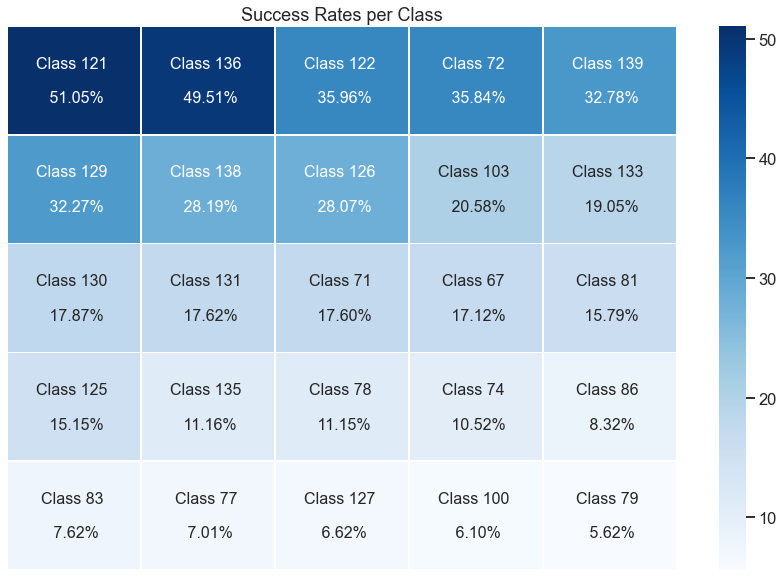

0         ID perc_indegree perc_betweenness perc_closeness perc_random  \
12       101          0.72            -0.02           0.72       -0.03   
7         79          6.17             5.88           4.81        5.39   
11       100          6.37             5.56           6.37        5.17   
18       127          5.39             7.24           7.22         7.1   
5         77          6.19             8.39           6.44        5.42   
9         83          7.62             7.62           7.62        8.37   
10        86         11.28             6.47           7.22        8.05   
4         74         12.52             6.54          12.51         8.9   
6         78         11.59            10.26          11.59          11   
23       135          9.55            11.15          12.79       11.24   
16       125         17.01            11.42          17.01       11.39   
8         81         15.78            16.16          15.42       16.53   
1         67         19.23               19          13.14       15.09   
2         71         17.66            17.48          17.66       20.75   
21       131         16.51            18.18          18.18       16.86   
20       130          18.4            16.82           18.4       16.81   
22       133         21.74            13.68          21.74       15.86   
13       103         15.31            22.98          23.45       15.35   
17       126         31.51            31.86          20.83       23.56   
25       138         29.58             25.4          29.58       26.42   
19       129         32.02            32.39          32.39        34.2   
26       139         32.49            33.35          32.49       35.52   
3         72         33.75            36.28          37.48       36.59   
15       122         35.96            35.96          35.96       35.01   
24       136         57.14            34.26          57.14       37.22   
14       121         51.49            50.17          51.49       35.14   
avg  106.308       20.1146          18.6338        19.9865     17.8042   

0   perc_maxpal perc_minpal perc_nointervention   perc_sni  
12         0.29         0.5                -0.4   0.473333  
7          5.06        5.95                5.76   5.620000  
11         3.73         4.5                4.32   6.100000  
18          8.4        5.77                6.76   6.616667  
5          4.72        5.31                4.27   7.006667  
9          9.37        8.82                8.16   7.620000  
10         7.06        8.14                8.12   8.323333  
4          9.94         7.3                8.32  10.523333  
6         11.05       11.39               11.24  11.146667  
23        10.69       10.39               11.17  11.163333  
16        12.51       10.07               10.94  15.146667  
8         16.44       16.32               16.49  15.786667  
1         18.98       13.25               14.42  17.123333  
2         36.65       18.33               19.92  17.600000  
21        17.64       15.72               17.16  17.623333  
20        17.67       17.48                16.9  17.873333  
22        23.82       14.96               14.95  19.053333  
13        22.29       14.05                15.1  20.580000  
17        37.04       21.29               23.67  28.066667  
25        35.91       24.49                25.3  28.186667  
19         32.3       33.98               34.16  32.266667  
26        51.72       33.14               34.71  32.776667  
3         44.95       35.76               36.99  35.836667  
15        33.53       35.17               35.81  35.960000  
24        56.88       34.19               36.77  49.513333  
14        31.61       33.96               35.19  51.050000  
avg     21.5481     16.9319             17.5462  19.578333

In [41]:
indif, success_rates=get_interventions_differences(class_dict=df_diffusion,model=['diffusion'],label=['gen'],percent=[15],writeToExcel=True)
fancy_heatmap(success_rates)
success_rates.loc['avg'] = success_rates.mean()
df_to_excel(success_rates,filename='successrates.xlsx',sheet='SuccessRates')
success_rates

In [43]:
indif.head()

0  ID networkType percent      model optimized d0_optimized d364_optimized  \
1  67         gen      15  diffusion                                         
2  71         gen      15  diffusion                                         
3  72         gen      15  diffusion                                         
4  74         gen      15  diffusion                                         
5  77         gen      15  diffusion                                         

0 outdegree d0_outdegree d364_outdegree  ... e_random  noint perc_outdegree  \
1  0.309005       1.6267         1.9357  ...           14.42             19   
2  0.389472      1.48541        1.87488  ...           19.92          26.22   
3   0.60608      1.61359        2.21967  ...           36.99          37.56   
4  0.103719       1.5283        1.63202  ...            8.32           6.79   
5  0.145542      1.85958        2.00512  ...            4.27           7.83   

0 perc_indegree perc_betweenness perc_closeness perc_maxpal perc_minpal  \
1         19.23               19          13.14       18.98       13.25   
2         17.66            17.48          17.66       36.65       18.33   
3         33.75            36.28          37.48       44.95       35.76   
4         12.52             6.54          12.51        9.94         7.3   
5          6.19             8.39           6.44        4.72        5.31   

0 perc_random perc_nointervention  
1       15.09               14.42  
2       20.75               19.92  
3       36.59               36.99  
4         8.9                8.32  
5        5.42                4.27  

[5 rows x 66 columns]

In [44]:
graph

In [46]:
# get_class_graphs(graph,writeToFile=True,label='gen')

In [47]:
for sg in graph:
    get_class_graphs(graph=sg,writeToFile=True,c_list=[sg.graph['class']])

In [27]:
# get_intervention_per_child_plots(classes_results=df_diffusion,save_png=True, create_doc=True, model=['diffusion'], label=['gen'], percent=[15])

create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****
create legend for subplot1
****create subplot2****
****create subplot2****


<Figure size 1152x1152 with 0 Axes>

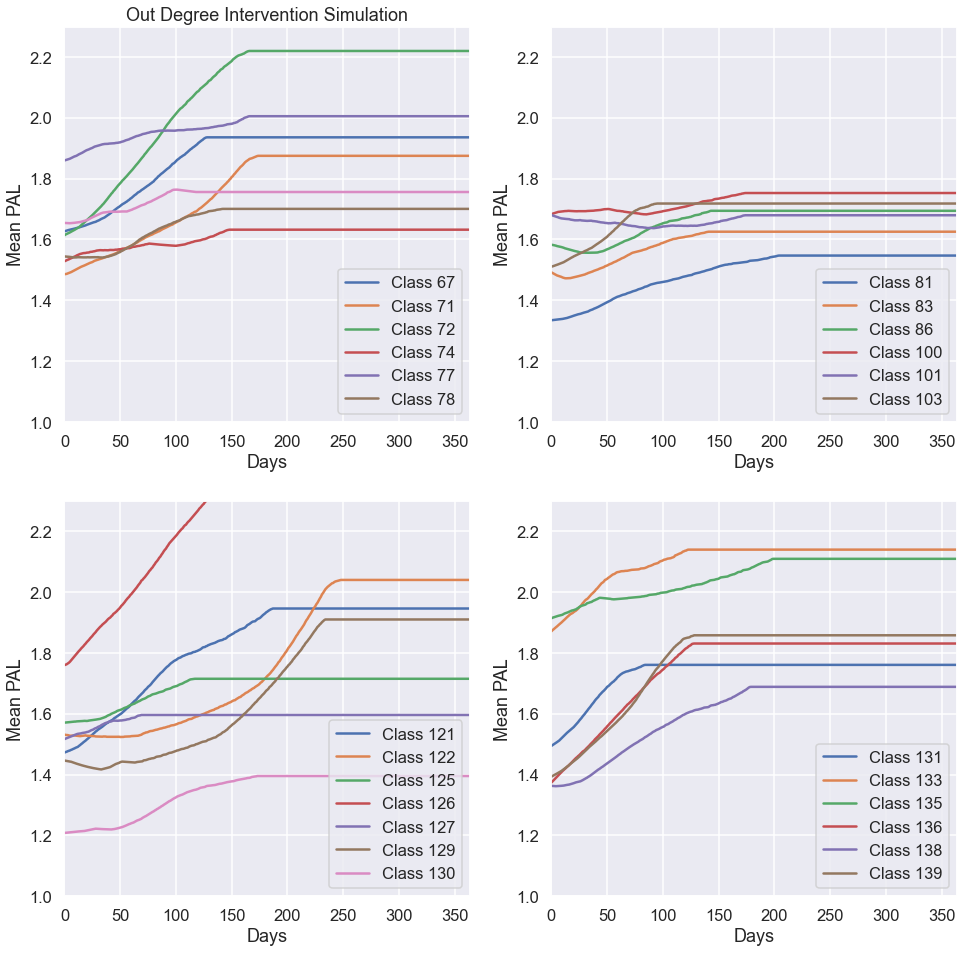

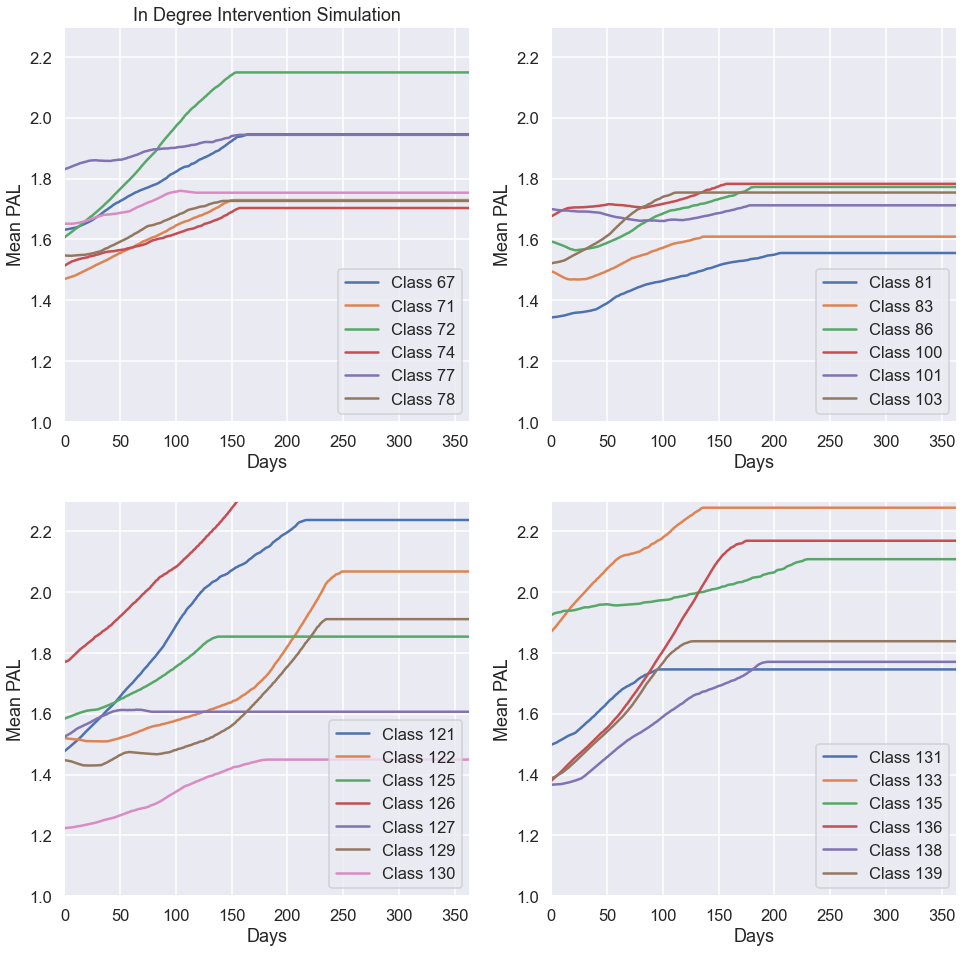

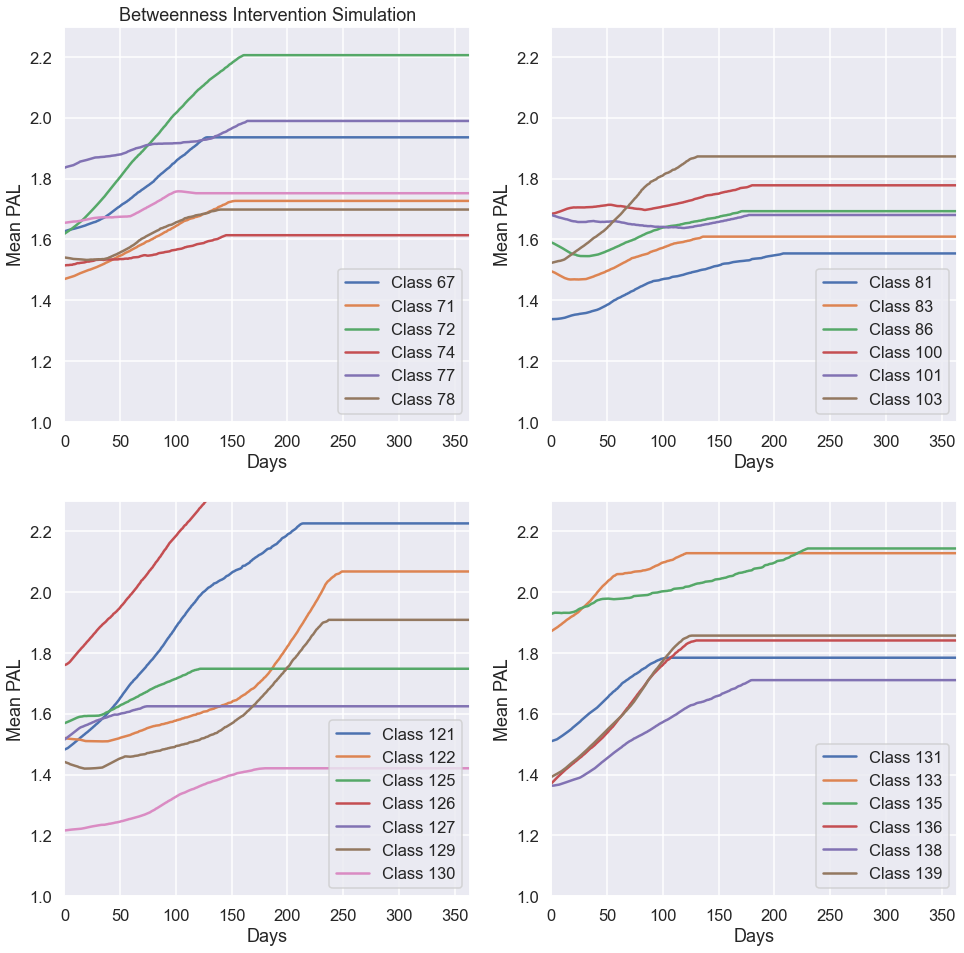

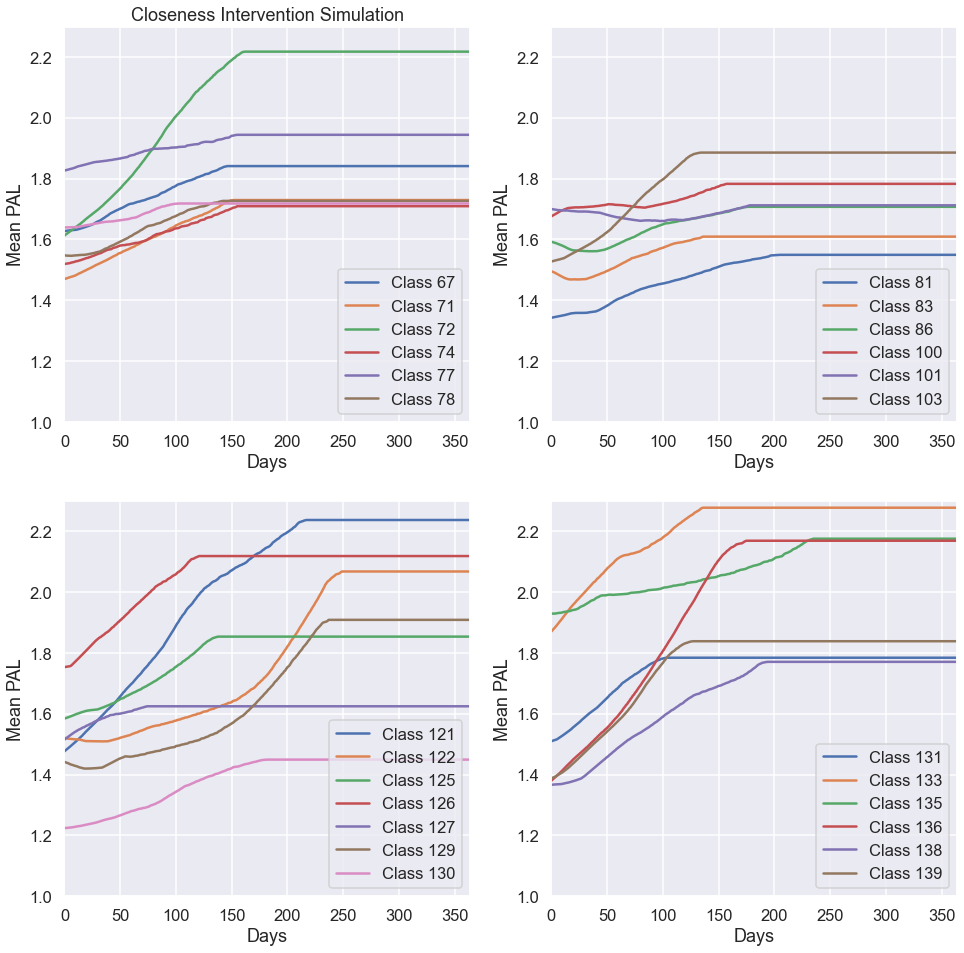

<Figure size 1152x1152 with 0 Axes>

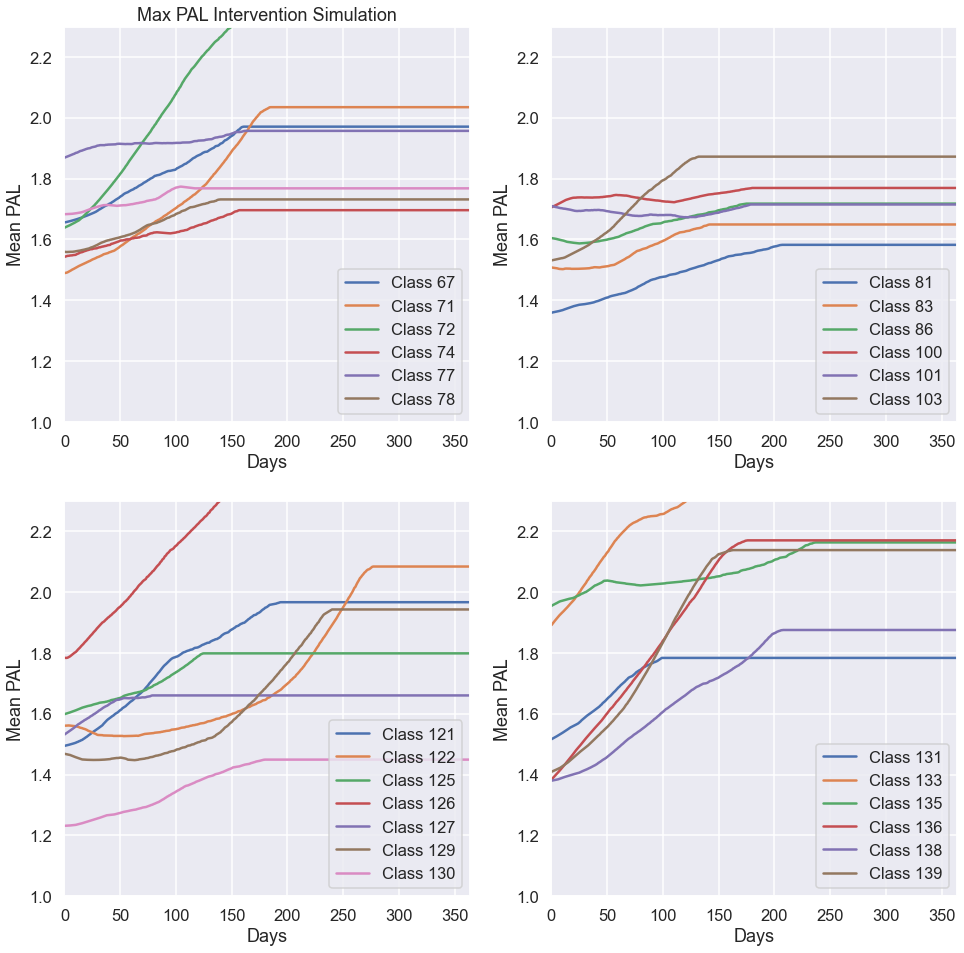

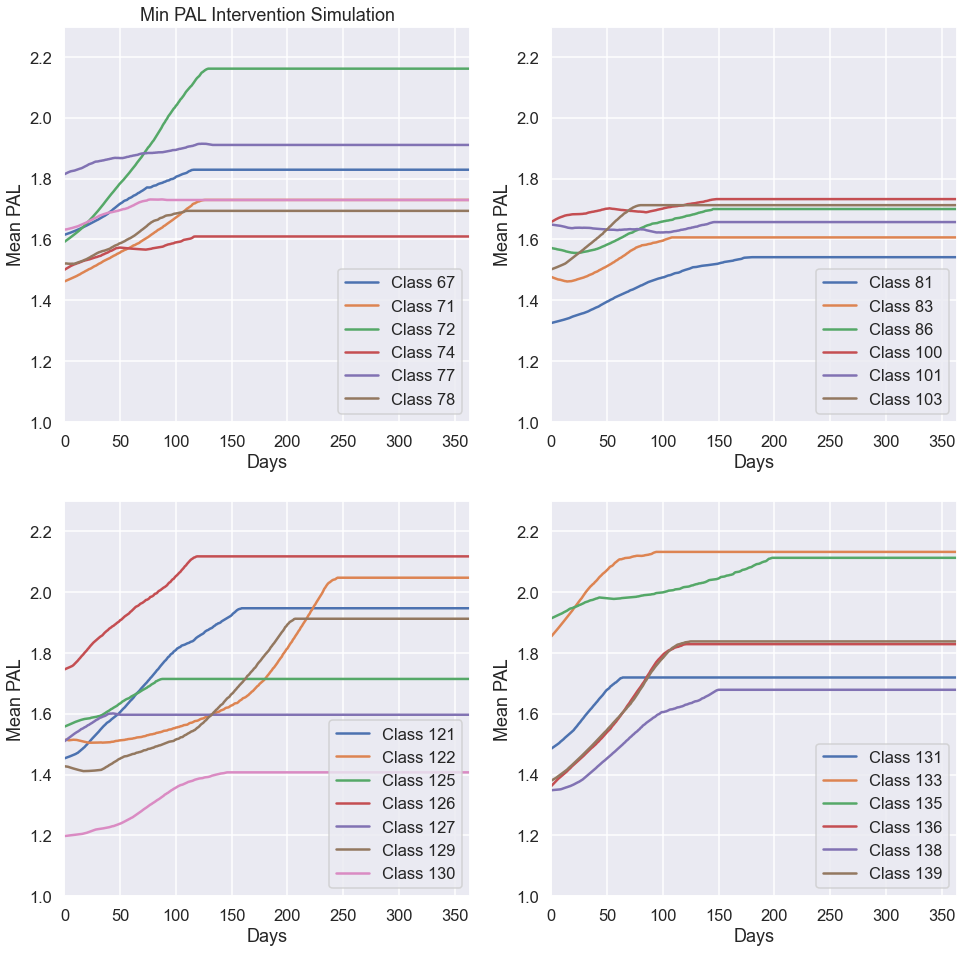

<Figure size 1152x1152 with 0 Axes>

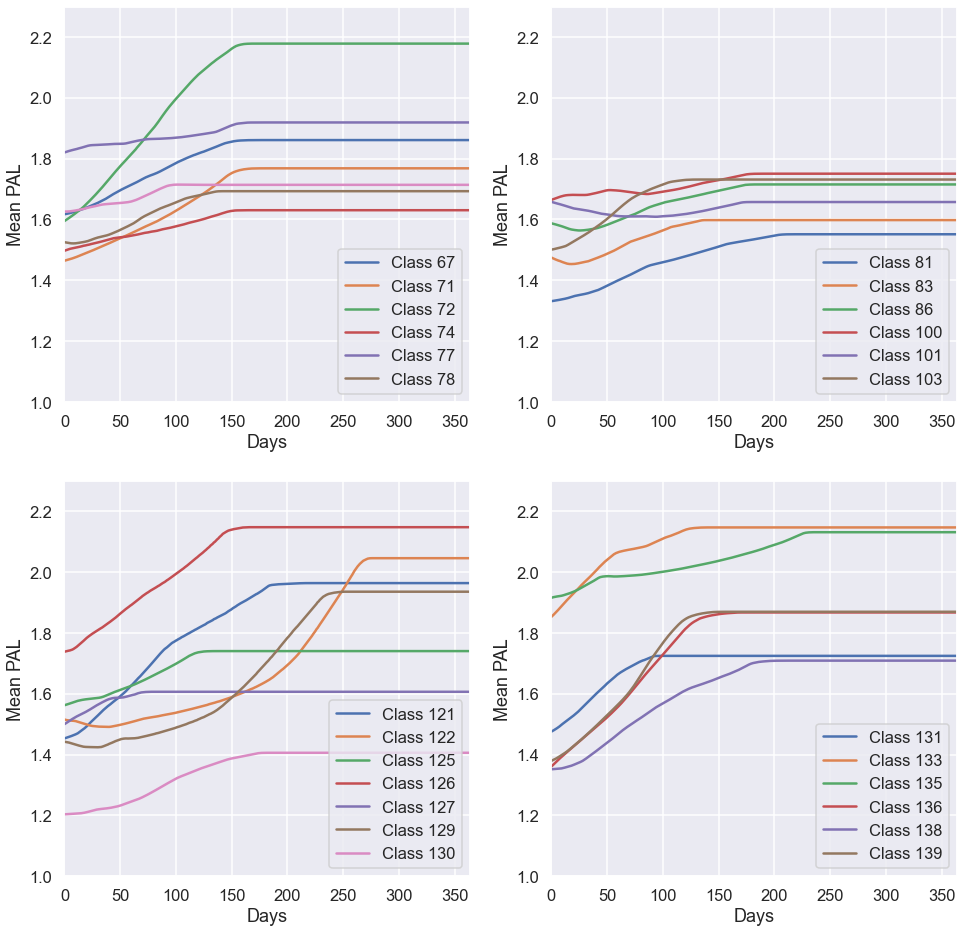

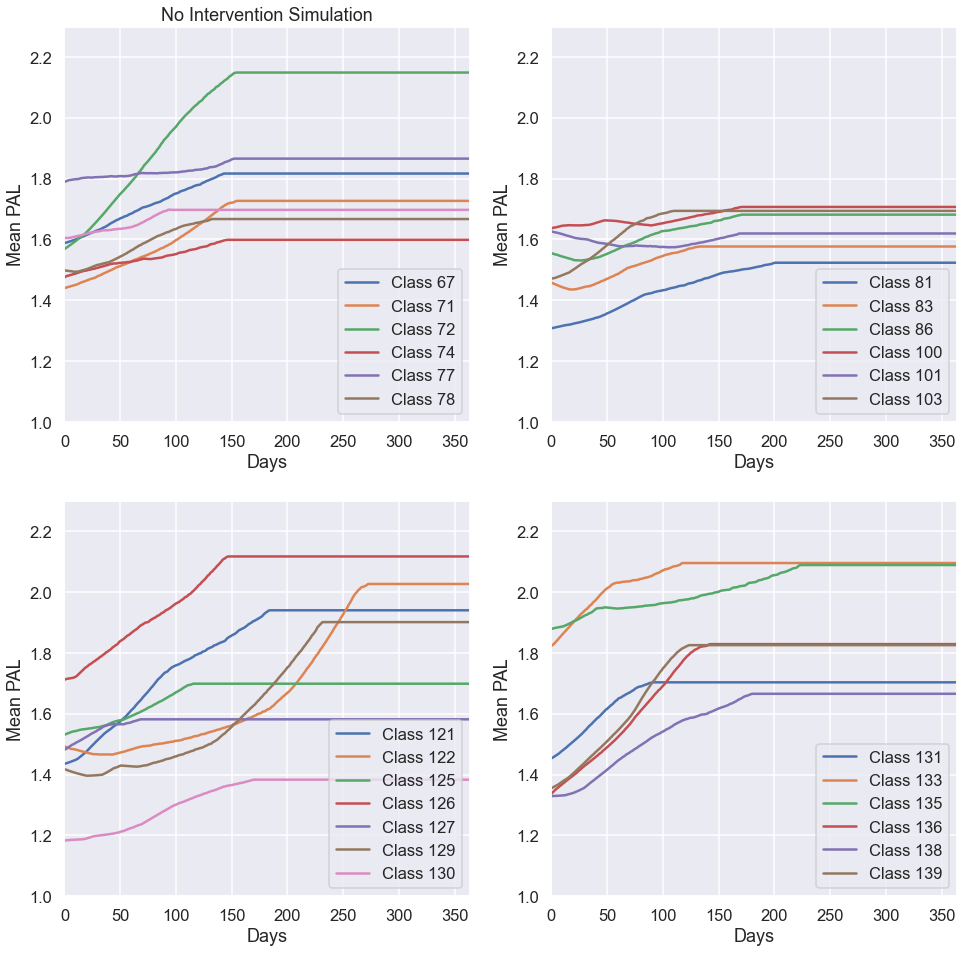

In [48]:
get_classes_intervention_comparison_plots(classes_results=df_diffusion,save_png=True, create_doc=True,model=['diffusion'], label=['gen'], percent=[15])

Comparing Models | Class with ID 67
Comparing Models | Class with ID 71
Comparing Models | Class with ID 72
Comparing Models | Class with ID 74
Comparing Models | Class with ID 77
Comparing Models | Class with ID 78
Comparing Models | Class with ID 79
Comparing Models | Class with ID 81
Comparing Models | Class with ID 83
Comparing Models | Class with ID 86
Comparing Models | Class with ID 100
Comparing Models | Class with ID 101
Comparing Models | Class with ID 103
Comparing Models | Class with ID 121
Comparing Models | Class with ID 122
Comparing Models | Class with ID 125
Comparing Models | Class with ID 126
Comparing Models | Class with ID 127
Comparing Models | Class with ID 129
Comparing Models | Class with ID 130
Comparing Models | Class with ID 131


/Users/bojansimoski/dev/vu/MMProject1/classes_analysis.py:943: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=((15,10)))


Comparing Models | Class with ID 133
Comparing Models | Class with ID 135
Comparing Models | Class with ID 136
Comparing Models | Class with ID 138
Comparing Models | Class with ID 139


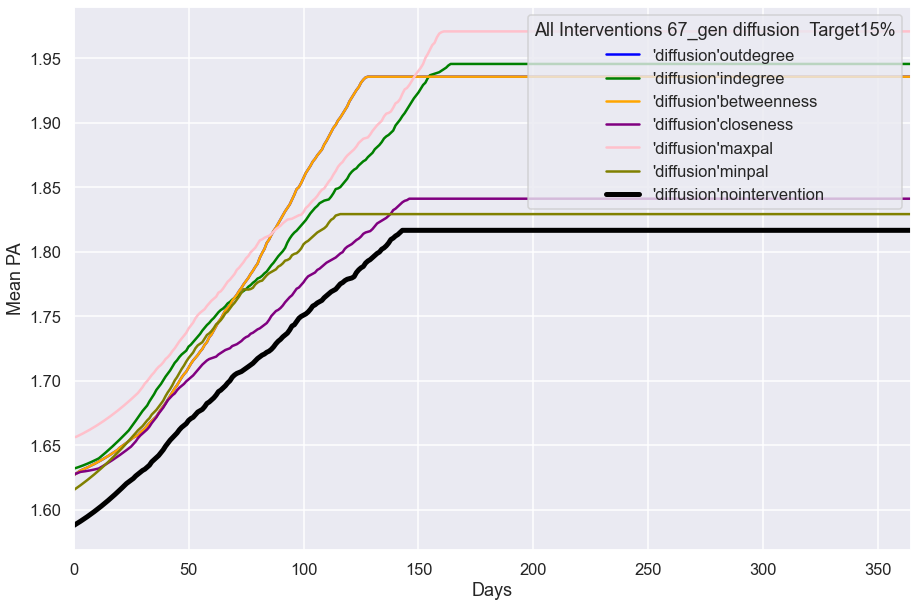

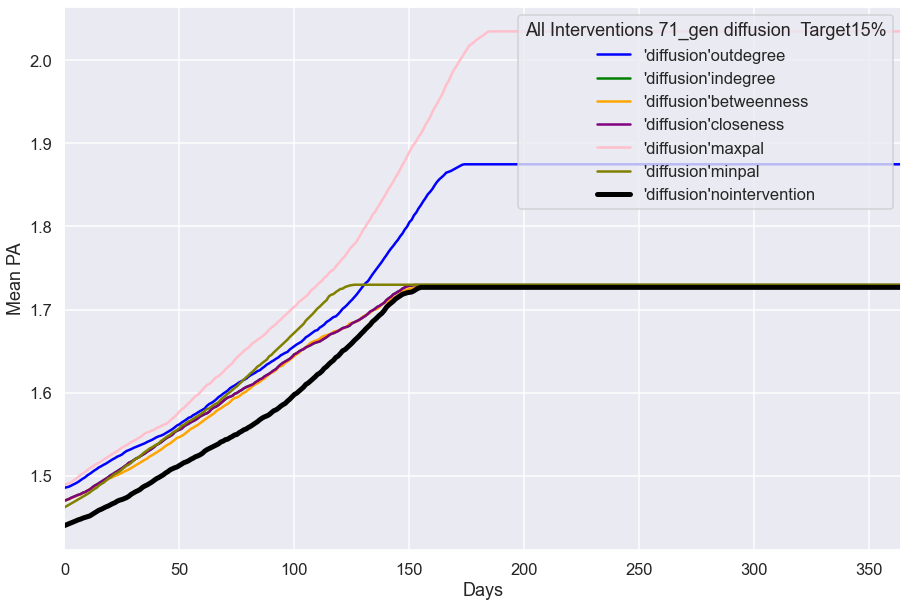

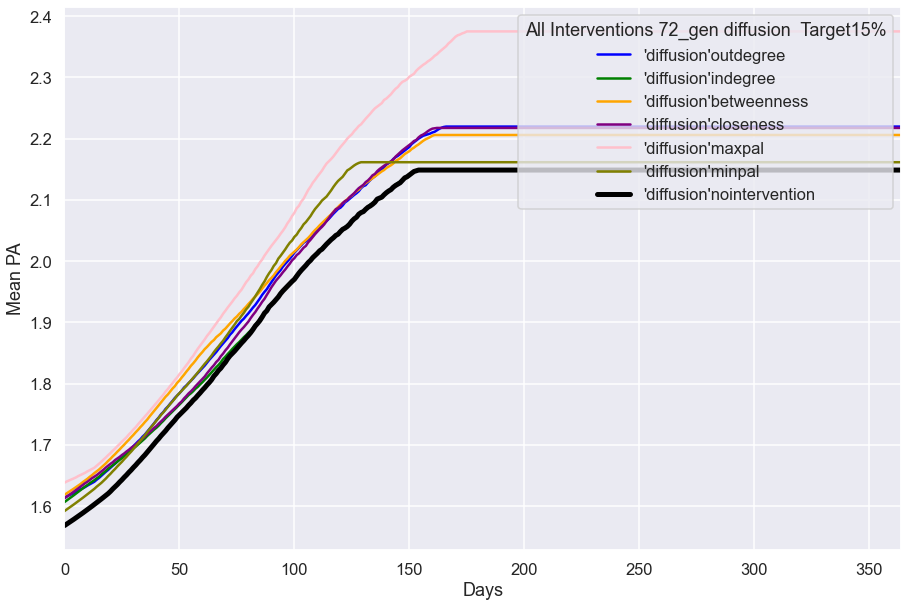

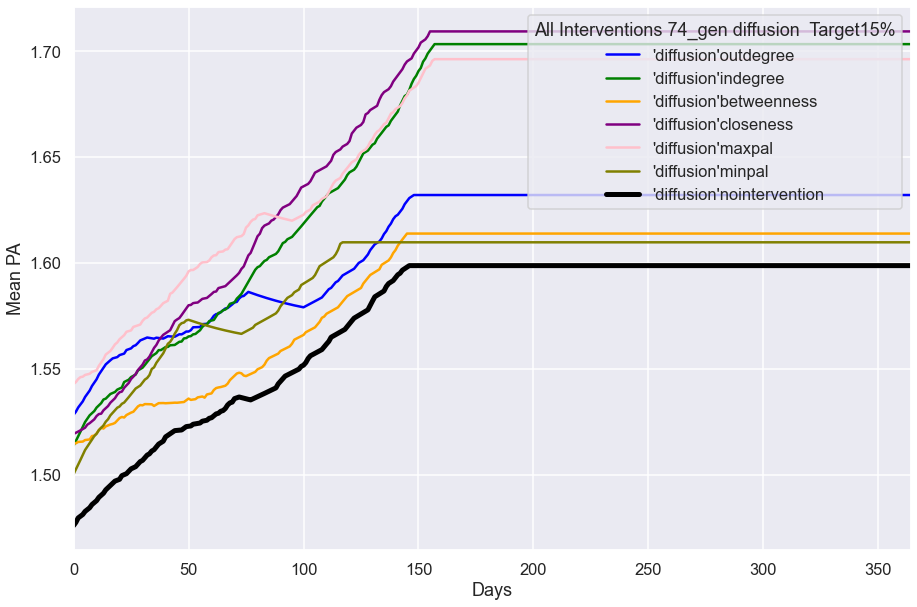

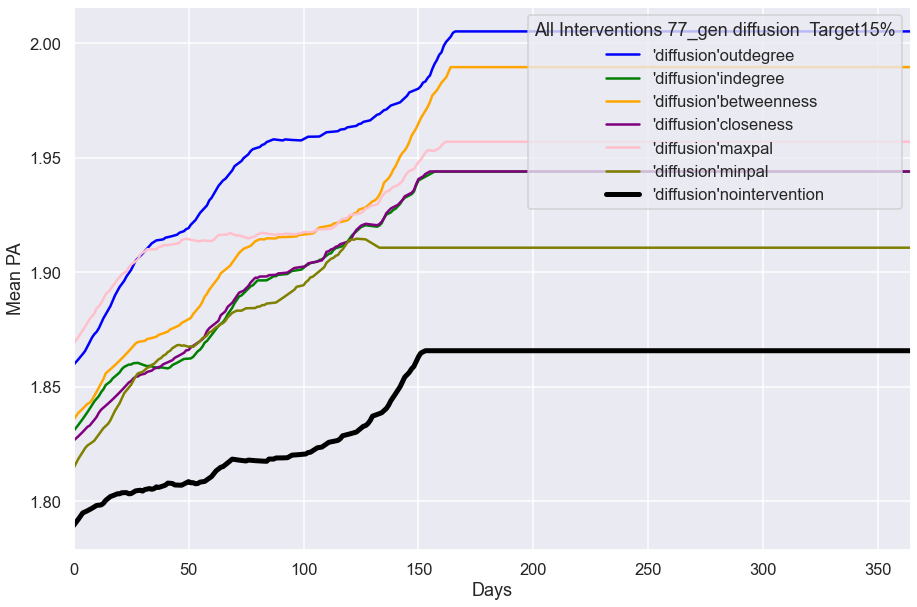

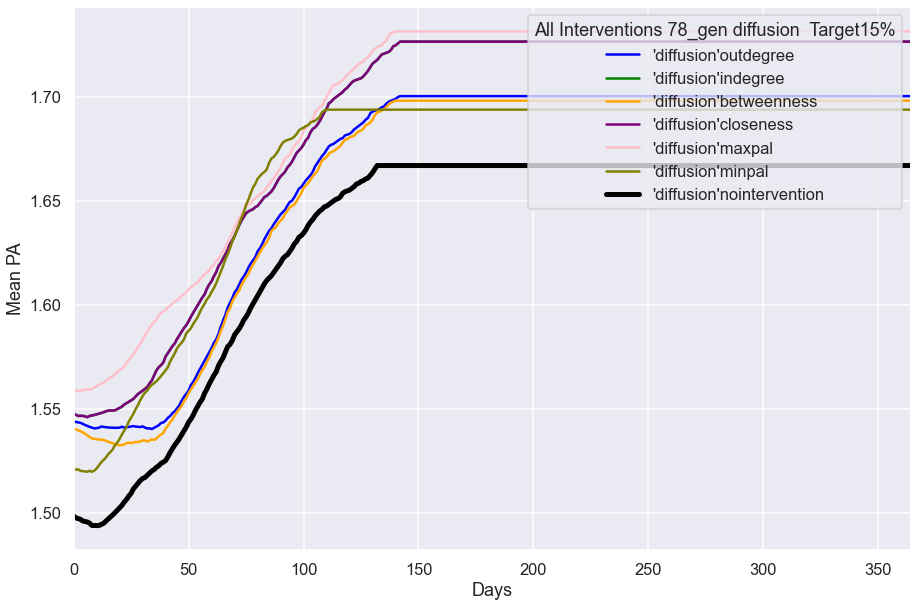

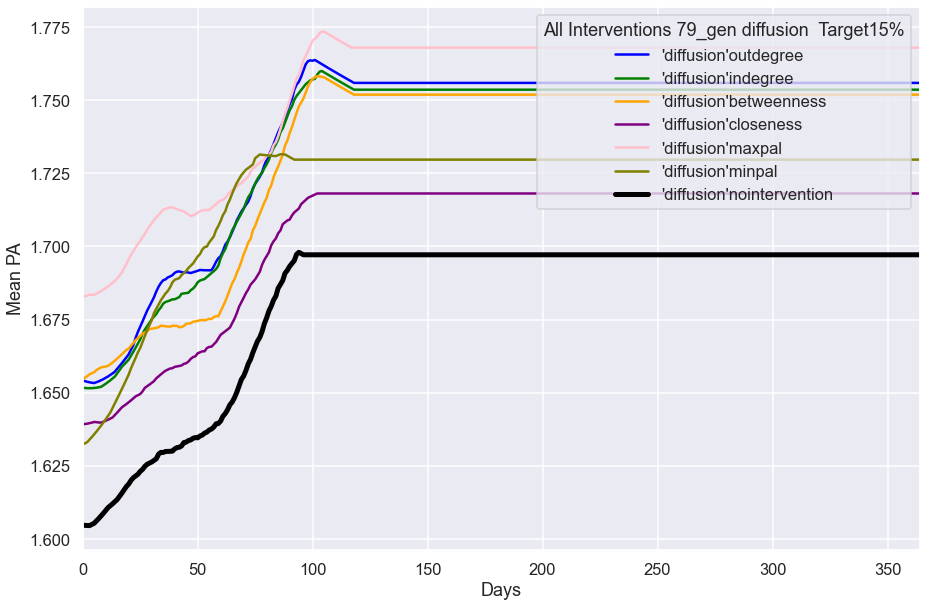

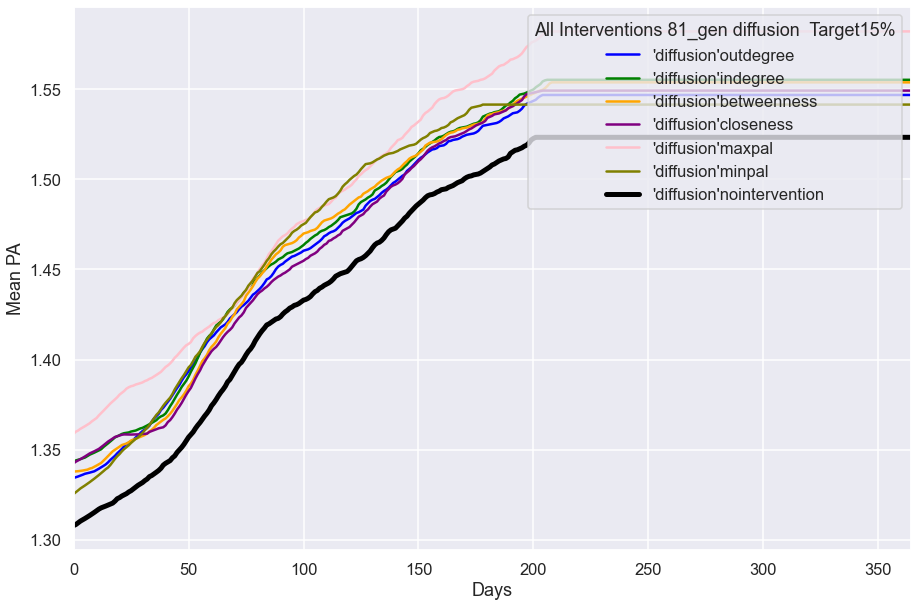

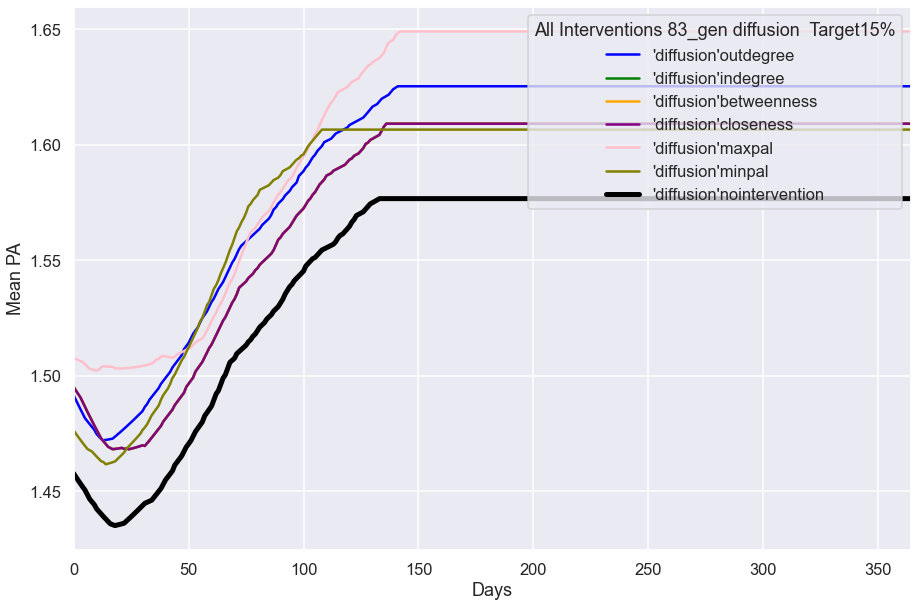

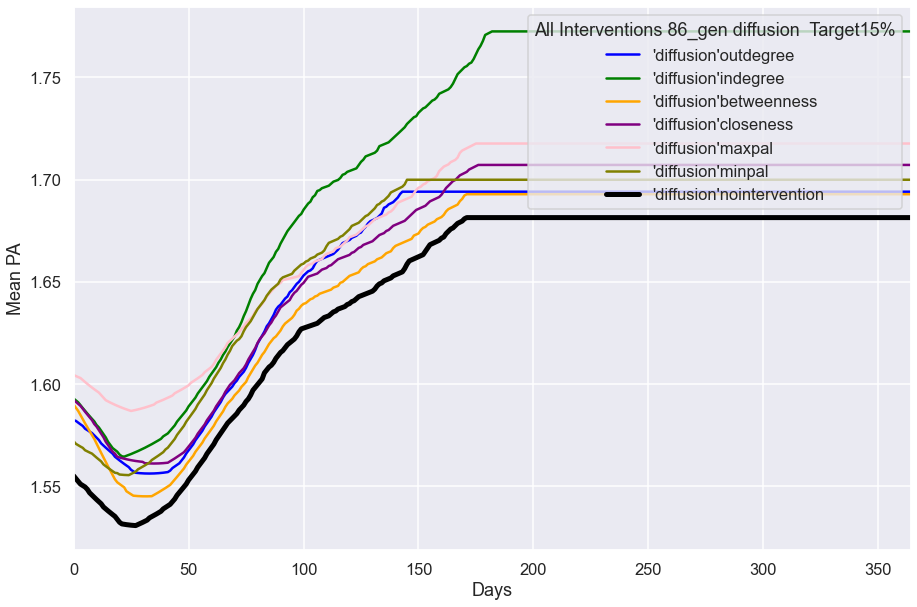

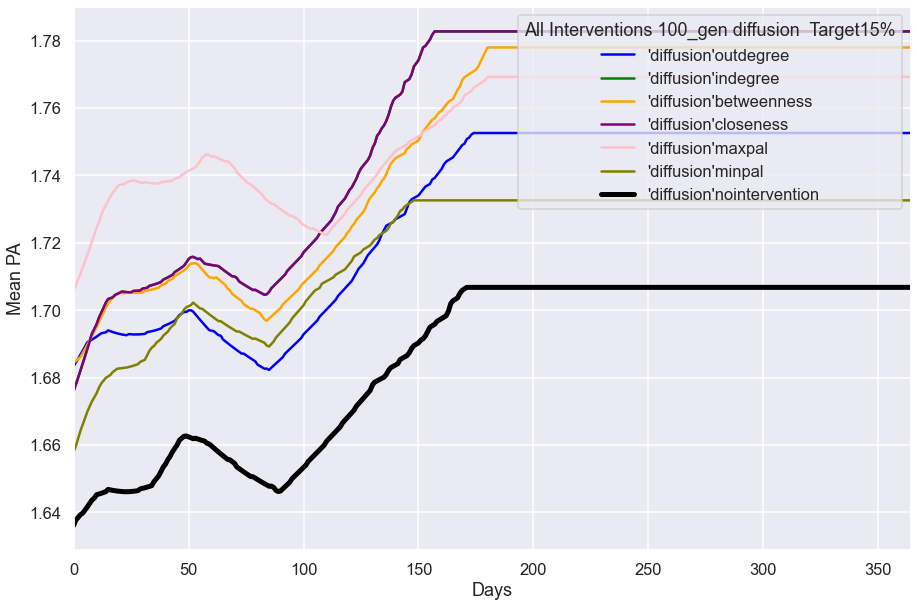

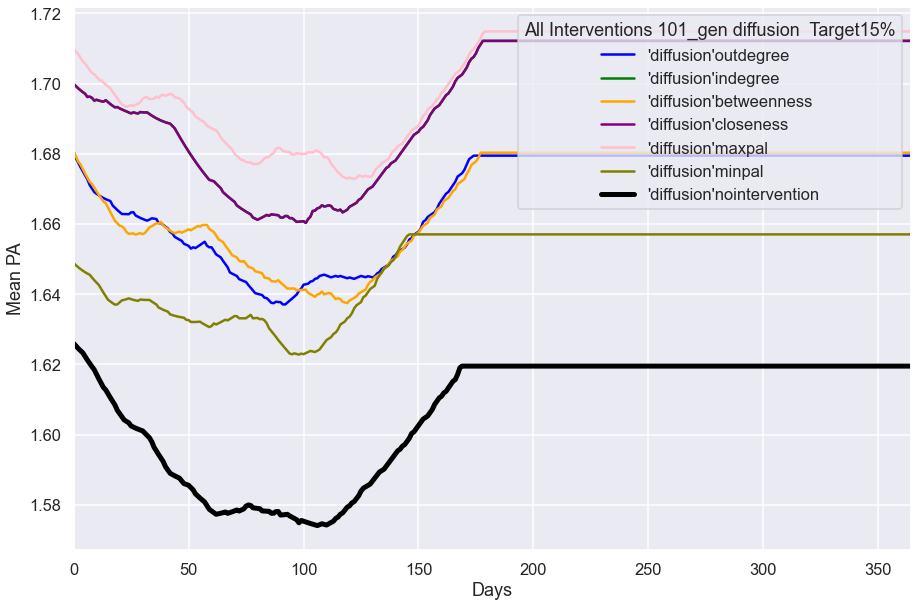

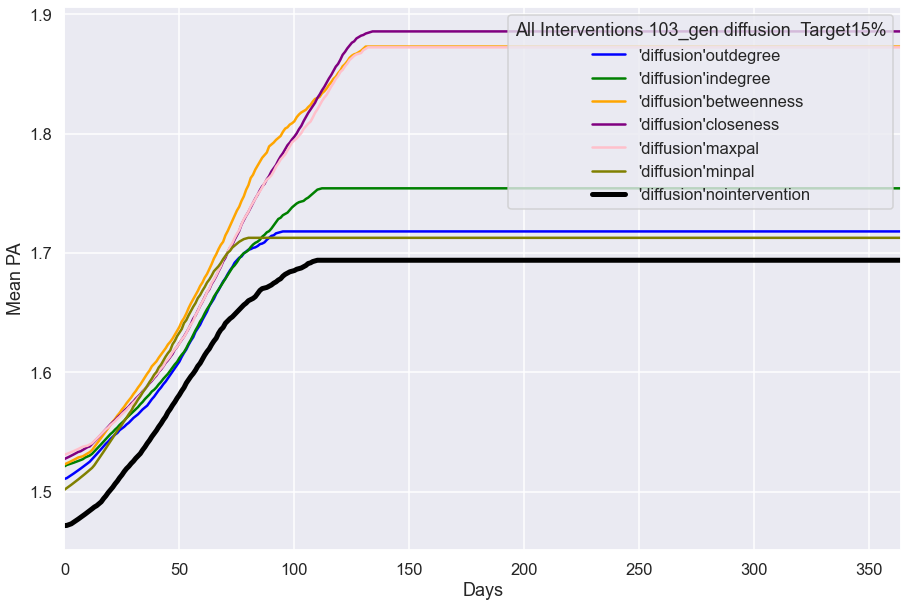

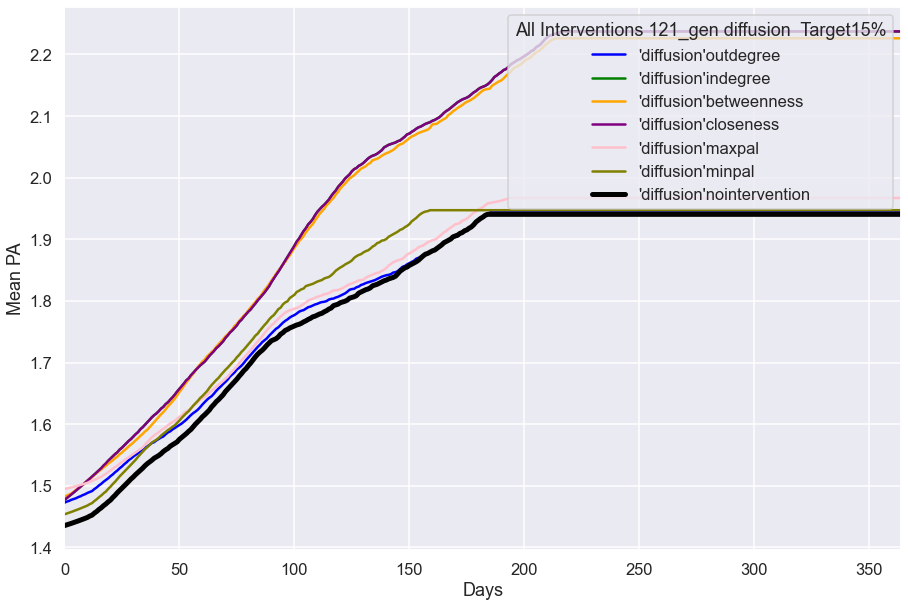

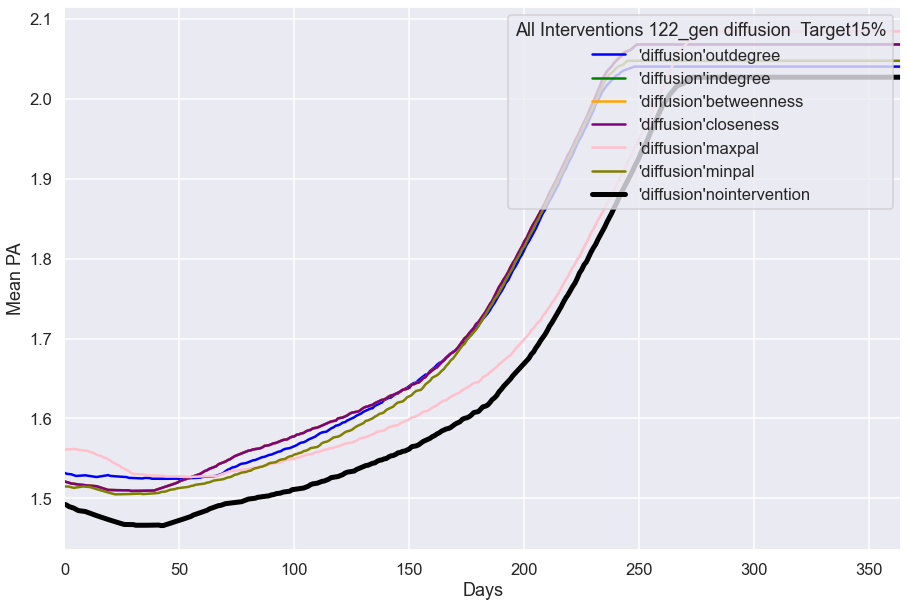

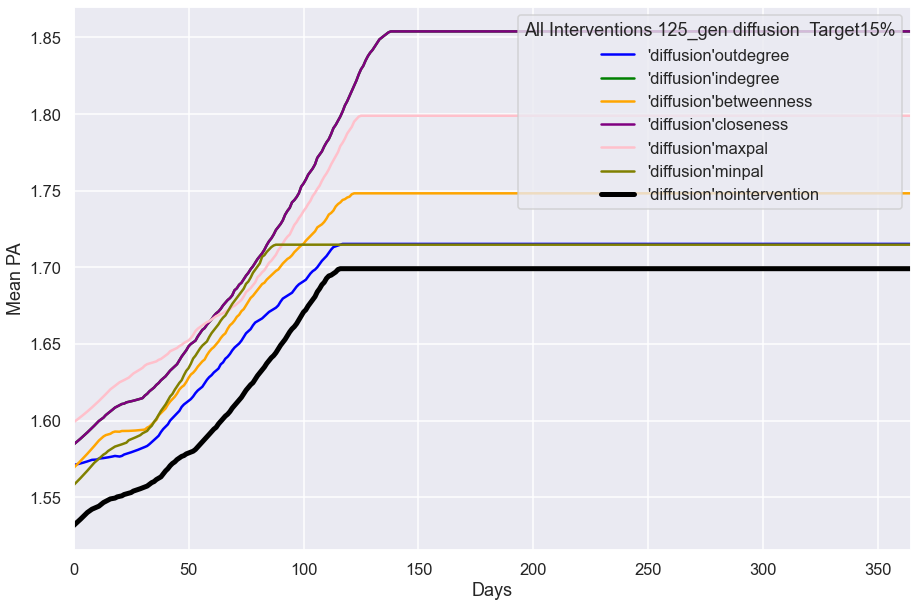

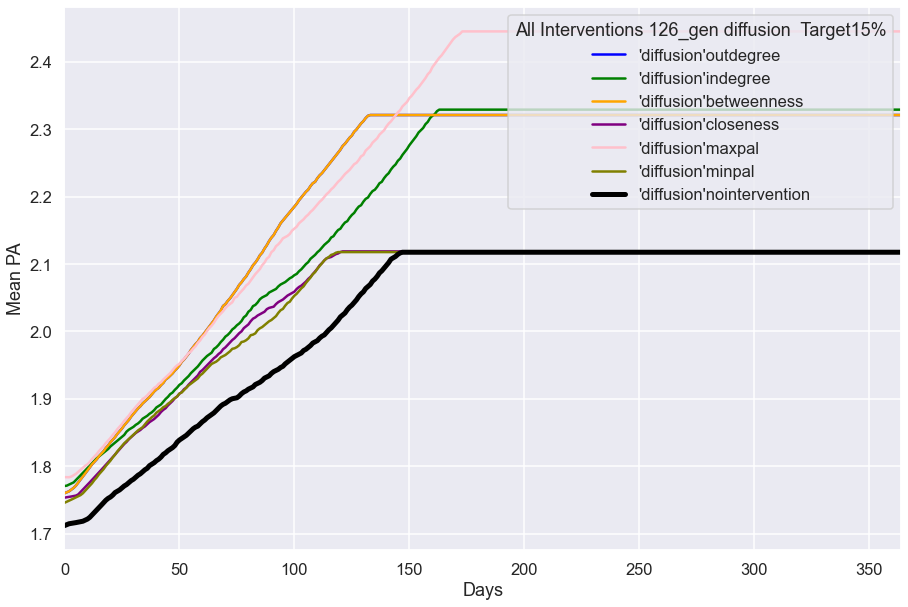

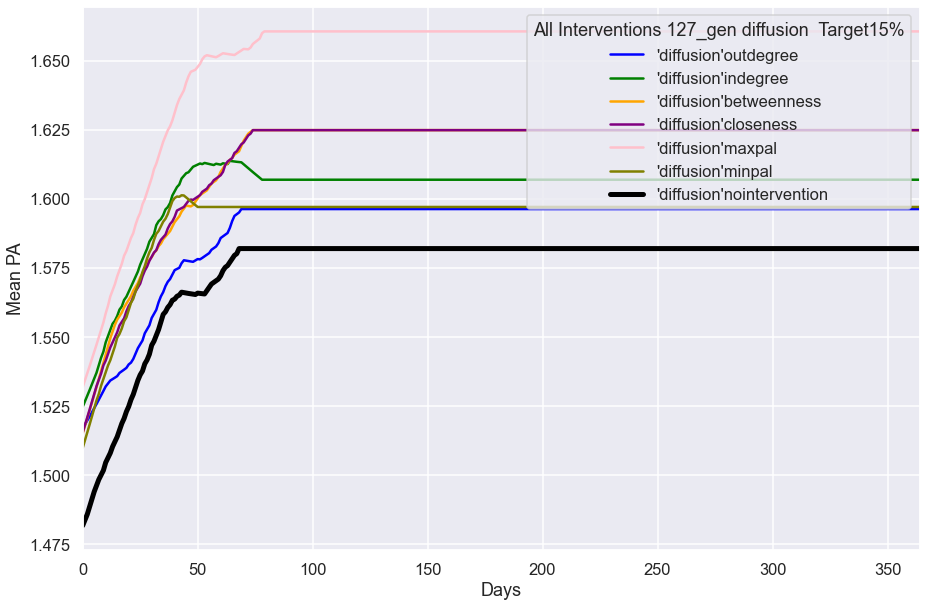

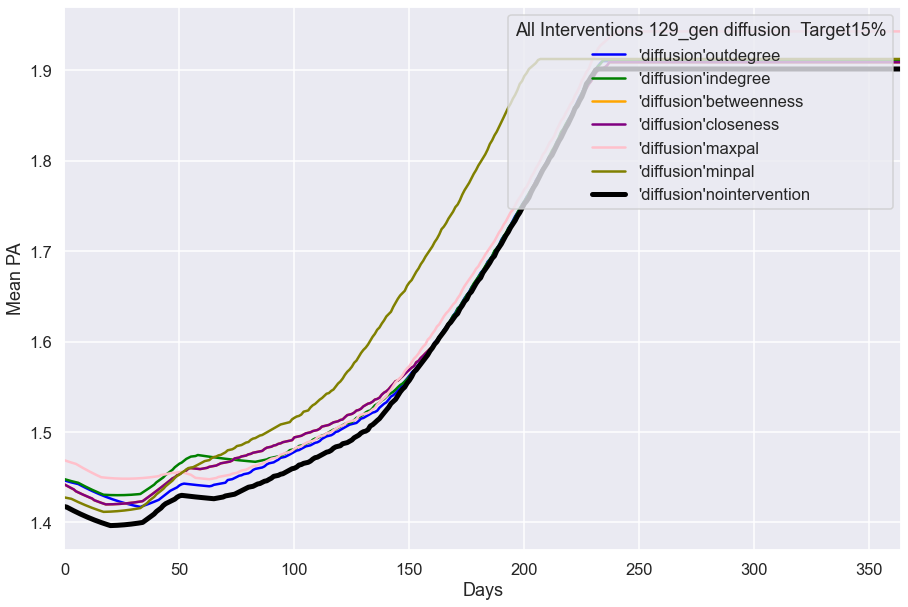

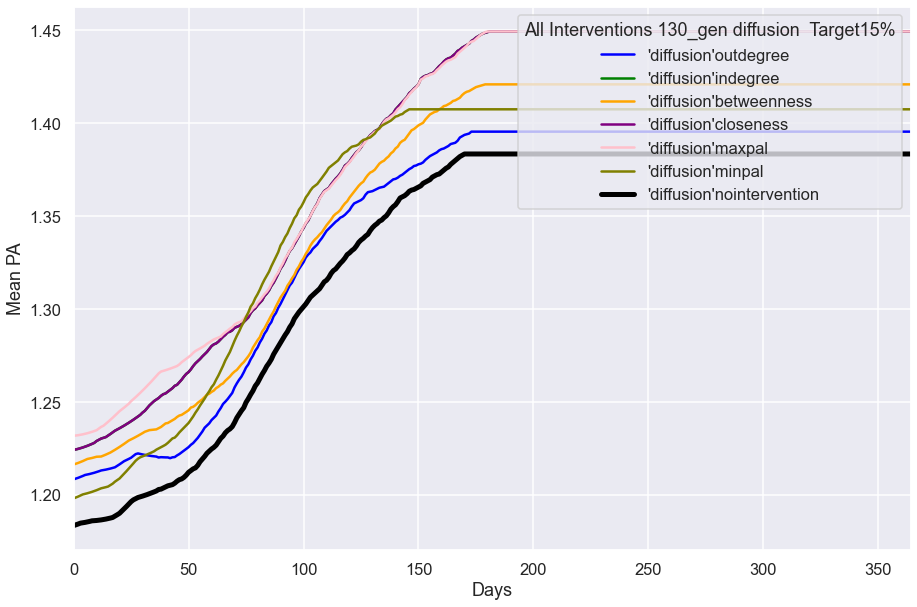

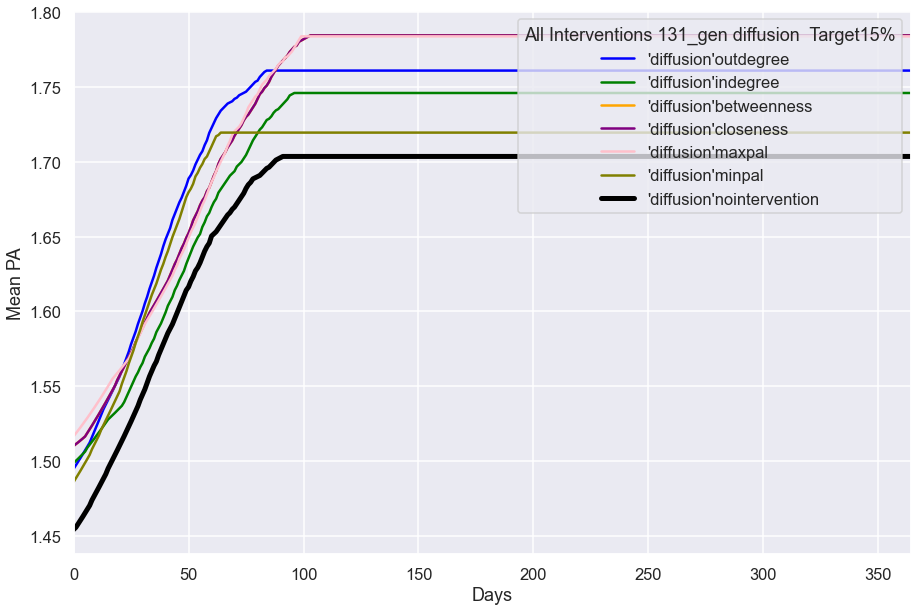

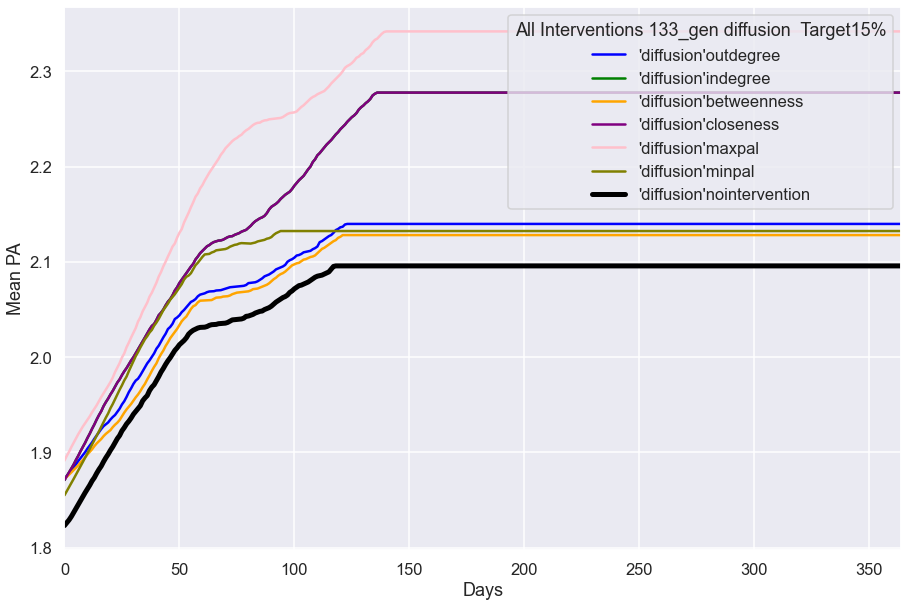

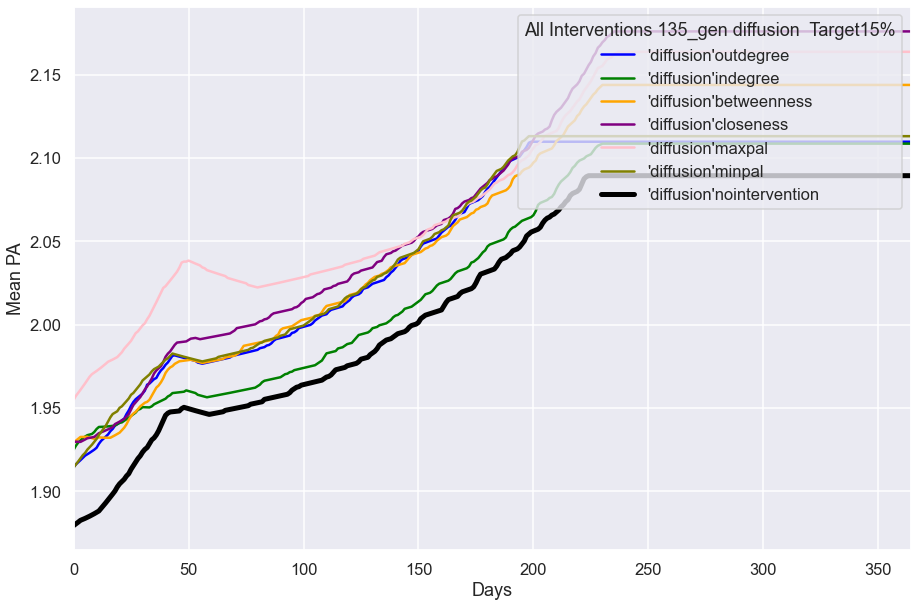

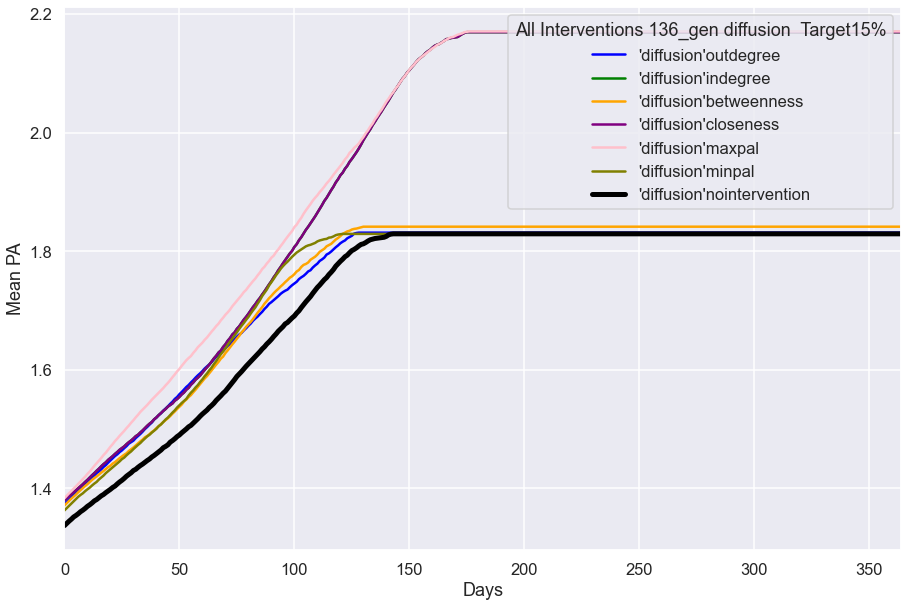

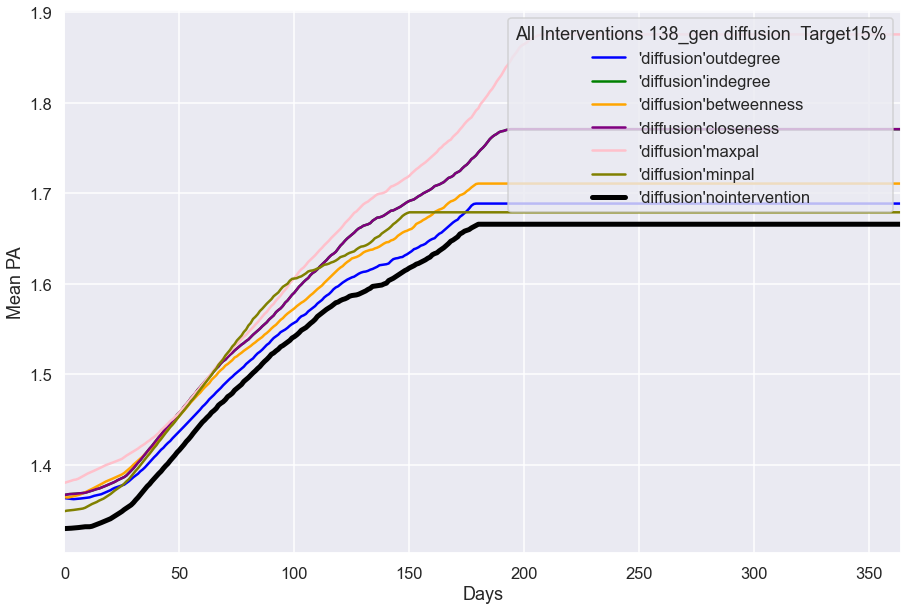

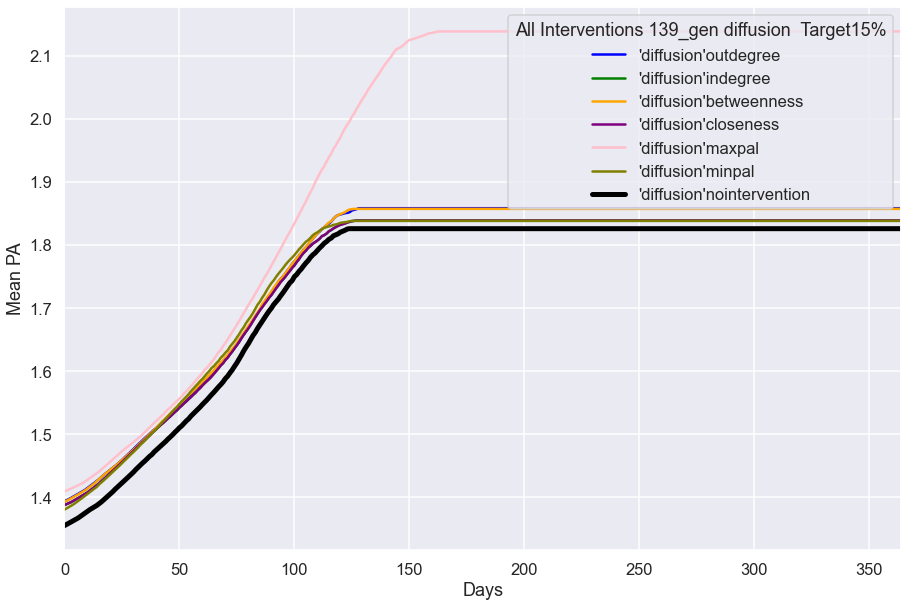

In [49]:
get_all_interventions_per_model_plots(classes_results=df_diffusion,save_png=True, create_doc=True,model=['diffusion'], label=['gen'], percent=[15])

Avg Success Rates Interventions
19.42 closeness
19.59 indegree
17.13 outdegree
18.21 betweenness
20.94 maxpal
16.46 minpal
17.06 nointervention


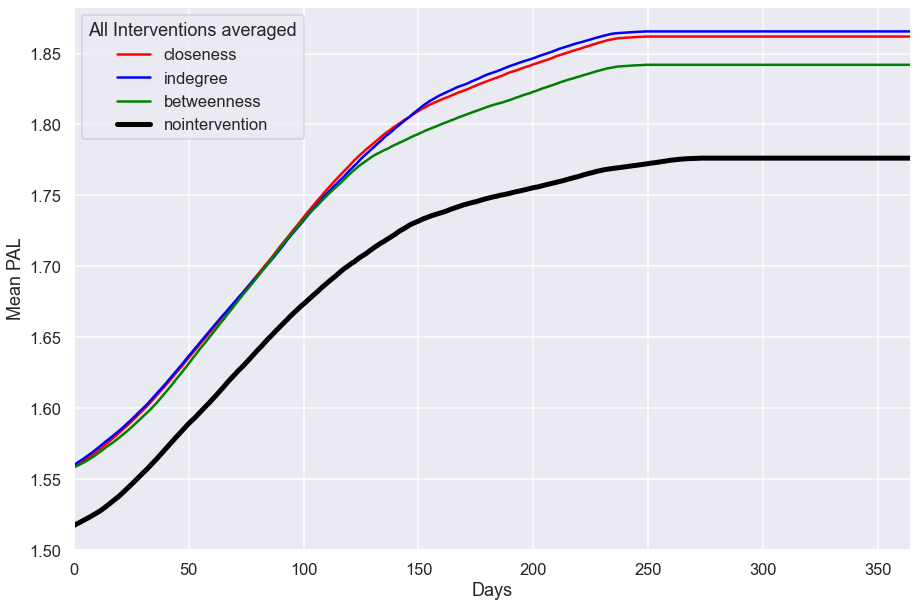

In [50]:
closeness=df_diffusion[0]['diffusion']['closeness']['gen'][15].mean(axis=1)
indegree=df_diffusion[0]['diffusion']['indegree']['gen'][15].mean(axis=1)
outdegree=df_diffusion[0]['diffusion']['outdegree']['gen'][15].mean(axis=1)
betweenness=df_diffusion[0]['diffusion']['betweenness']['gen'][15].mean(axis=1)
maxpal=df_diffusion[0]['diffusion']['maxpal']['gen'][15].mean(axis=1)
minpal=df_diffusion[0]['diffusion']['minpal']['gen'][15].mean(axis=1)
nointervention=df_diffusion[0]['diffusion']['nointervention']['gen'][15].mean(axis=1)
random=df_diffusion[0]['diffusion']['random']['gen'][15].mean(axis=1)
for i in range(1,26):
    closeness=closeness.add(df_diffusion[i]['diffusion']['closeness']['gen'][15].mean(axis=1))
    indegree=indegree.add(df_diffusion[i]['diffusion']['indegree']['gen'][15].mean(axis=1))
    outdegree=outdegree.add(df_diffusion[i]['diffusion']['outdegree']['gen'][15].mean(axis=1))
    betweenness=betweenness.add(df_diffusion[i]['diffusion']['betweenness']['gen'][15].mean(axis=1))
    maxpal=maxpal.add(df_diffusion[i]['diffusion']['maxpal']['gen'][15].mean(axis=1))
    minpal=minpal.add(df_diffusion[i]['diffusion']['minpal']['gen'][15].mean(axis=1))
    nointervention=nointervention.add(df_diffusion[i]['diffusion']['nointervention']['gen'][15].mean(axis=1))
    random=random.add(df_diffusion[i]['diffusion']['random']['gen'][15].mean(axis=1))

writer = pd.ExcelWriter('AveragedOutput.xlsx')
closeness=closeness/26
closeness.to_excel(writer,'closeness')
indegree=indegree/26
indegree.to_excel(writer,'indegree')
outdegree=outdegree/26
outdegree.to_excel(writer,'outdegree')
betweenness=betweenness/26
betweenness.to_excel(writer,'betweenness')
maxpal=maxpal/26
maxpal.to_excel(writer,'maxpal')
minpal=minpal/26
minpal.to_excel(writer,'minpal')
nointervention=nointervention/26
nointervention.to_excel(writer,'nointervention')
random=random/26
random.to_excel(writer,'random')
writer.save()

plt.figure(figsize=((15,10)))
plt.xlim(0,364)
plt.xlabel('Days')
plt.ylabel('Mean PAL')
closeness.plot(color='red',label='closeness')
indegree.plot(color='blue',label='indegree')
# outdegree.plot(color='yellow',label='outdegree')
betweenness.plot(color='green',label='betweenness')
# maxpal.plot(color='purple',label='maxpal')
# minpal.plot(color='orange',label='minpal')
nointervention.plot(style='-', linewidth=5, color='black',label='nointervention')
# random.plot(color='pink',label='random')
plt.legend(title='All Interventions averaged' )
print('Avg Success Rates Interventions')
print(repr(get_change(closeness[364],closeness[0]))+' closeness')
print(repr(get_change(indegree[364],indegree[0]))+' indegree')
print(repr(get_change(outdegree[364],outdegree[0]))+' outdegree')
print(repr(get_change(betweenness[364],betweenness[0]))+' betweenness')
print(repr(get_change(maxpal[364],maxpal[0]))+' maxpal')
print(repr(get_change(minpal[364],minpal[0]))+' minpal')
print(repr(get_change(nointervention[364],nointervention[0]))+' nointervention')

In [ ]:
# writeClassesInterventionToExcel(classes_results=df_diffusion)

In [52]:
# corr,pval,stats=get_correlations(dct=df_diffusion,model='diffusion')

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_vulnerability']].values
# plt.scatter(x,y)
# plt.xlabel("OutDegree Centralization")
# plt.ylabel("Vulnerability - Diffusion")

In [ ]:
# df_to_excel(corr.round(2),filename='Correlations.xlsx',sheet='Correlations')

In [ ]:
# df_to_excel(pval.round(3),filename='PVals.xlsx',sheet='PVals')

In [9]:
# start_points=indif[['ID','d0_outdegree','d0_indegree','d0_betweenness','d0_closeness','d0_nointervention','d0_maxpal']]

In [10]:
# start_points=start_points.sort_values('d0_nointervention')

In [11]:
# start_points=start_points.astype(float).round(2)

In [21]:
# end_points=indif[['ID','d364_outdegree','d364_indegree','d364_betweenness','d364_closeness','d364_nointervention','d364_maxpal']]

In [22]:
# end_points=end_points.sort_values('d364_nointervention')

In [24]:
df_to_excel(start_points,filename='start_points.xlsx',sheet='start_points')

In [ ]:
# get_classes_intervention_comparison_plots(classes_results=df_diffusion,save_png=True, create_doc=True,model=['diffusion'],label=['gen'],percent=[20])

In [ ]:
# xls_file = pd.ExcelFile('Results/ClassesSummary/networkanalysis_gen_final.xlsx')
# net = xls_file.parse('Class')

In [ ]:
# net[['ID','RClosenessCentralization']].sort_values('RClosenessCentralization')

In [ ]:
# indif

In [ ]:
# corr.round(2)

In [ ]:
# pval.round(3)

In [ ]:
#         x=stats[['ROutDegreeCentralization']].values
#         y=stats[['diffusion_vulnerability']].values
#         df = pd.DataFrame()
#         x=list(chain.from_iterable(x.tolist()))
#         y=list(chain.from_iterable(y.tolist()))
#         df['Out Degree Centralization']=x
#         df['Vulnerability']=y

In [ ]:
# g = sns.jointplot("Out Degree Centralization", "Vulnerability", data=df, kind="reg", size=8)

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_noint']].values
# df = pd.DataFrame()
# x=list(chain.from_iterable(x.tolist()))
# y=list(chain.from_iterable(y.tolist()))
# df['Out Degree Centralization']=x
# df['No Intervention']=y
# g = sns.jointplot("Out Degree Centralization", "No Intervention", data=df, kind="reg", size=8)

In [ ]:
# # heatmap stuff
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)

In [ ]:
# hm=hm.drop(hm.index[len(hm)-1])

In [ ]:
# df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')

In [ ]:
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')

In [ ]:
# hm

In [ ]:
# # hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)
# # hm=hm.drop(hm.index[12])
# # df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')
# hm=hm.reset_index()
# cls=(np.asarray(hm['ID'])).reshape(5,5)
# perc=(np.asarray(hm['perc_total'])).reshape(5,5)
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)
# fig, ax =plt.subplots(figsize=(15,10))
# title= "Success Rates per Class"
# plt.title(title,fontsize=18)
# ttl=ax.title
# ttl.set_position([0.5,1.05])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')
# sns.heatmap(result,annot=labels,annot_kws={"size": 16},fmt="",cmap="Blues",linewidths=0.30,ax=ax)
# plt.show()

In [ ]:
# result

In [ ]:
# cls

In [ ]:
# perc

In [ ]:
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')

In [ ]:
# result

In [ ]:
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)

In [ ]:
# labels

In [ ]:
# # heatmap stuff
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)
# hm=hm.drop(hm.index[len(hm)-1])
# df_to_excel(hm,filename='heatmap.xlsx',sheet='heatmap')
# hm=pd.ExcelFile('heatmap.xlsx',sheet_name='heatmap')
# hm=hm.parse('heatmap')
# cls=(np.asarray(hm['ID'])).reshape(5,5)
# perc=(np.asarray(hm['perc_total'])).reshape(5,5)
# result=hm.pivot(index='Yrows',columns='Xrows',values='perc_total')
# labels=(np.asarray(["Class {0} \n \n {1:.2f}%".format(c,p)
#                   for c,p in zip(cls.flatten(),perc.flatten())])
#        ).reshape(5,5)
# fig, ax =plt.subplots(figsize=(15,10))
# title= "Success Rates per Class"
# plt.title(title,fontsize=18)
# ttl=ax.title
# ttl.set_position([0.5,1.05])
# ax.set_xticks([])
# ax.set_yticks([])
# ax.axis('off')
# sns.heatmap(result,annot=labels,annot_kws={"size": 16},fmt="",cmap="Blues",linewidths=0.30,ax=ax)
# plt.show()

In [ ]:
# hm=success_rates[['ID','perc_total']].sort_values('perc_total',ascending=False)

In [ ]:
# hm

In [ ]:
# get_classes_intervention_comparison_plots(classes_results=df_diffusion,model=['diffusion'], label=['gen'], percent=[20], intervention=['centrality', 'high_risk', 'vulnerability'])

In [ ]:
# x=stats[['ROutDegreeCentralization']].values
# y=stats[['diffusion_high_risk']].values
# df = pd.DataFrame()
# x=list(chain.from_iterable(x.tolist()))
# y=list(chain.from_iterable(y.tolist()))
# df['Out Degree Centralization']=x
# df['High Risk Intervention']=y
# sns.set_style("white")
# sns.set_context("talk", font_scale=1.2,rc={"lines.linewidth": 2.5})
# g = sns.jointplot("Out Degree Centralization", "High Risk Intervention", data=df, kind="reg", size=8)
# g.savefig('myimage.png', format='png', dpi=1200)

In [ ]:
# graphGen

In [ ]:
# get_class_graphs(graph=graphGen,writeToFile=True)

In [ ]:
# get_df_class_children_topology_analysis(graphGen=[graphGen],generateGephiFiles=True)

In [ ]:
# df_diffusion

In [ ]:
# nx.draw(testGraph)
# plt.show()

In [ ]:
# diffuse_behavior_PA(testGraph)